In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

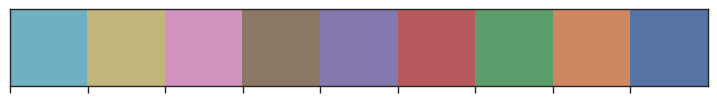

In [9]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('deep', 10, desat = 0.8)
colors = colors[::-1]
colors.pop(2)

sns.set_palette(colors)

sns.palplot(colors)
plt.rcParams['axes.grid'] = True

plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['axes.facecolor'] = 'lightgrey'

plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = 'white'

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 100

plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'
plt.rcParams['legend.shadow'] = False
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.fancybox'] = True
plt.rcParams['legend.fontsize'] = 'large'


rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [10]:
analog_freq = np.array([10,20,30,40,50,60,70,80,90,100,120,140,160,180])

dig_hex = np.array(['00001380', '00009c0', '0000680', '00004e0', '00003a8', '0000340', '0000270','0000270', '0000208','00001a0', '00001a0', '0000138', '0000138', '00000d0'])

clk_cycles = np.zeros_like(analog_freq)

for el in range(len(dig_hex)):
    clk_cycles[el] = int(dig_hex[el], 16)

digital_freq = 1/(clk_cycles*2*10**-8)/1000

clk_cycles

array([4992, 2496, 1664, 1248,  936,  832,  624,  624,  520,  416,  416,
        312,  312,  208])

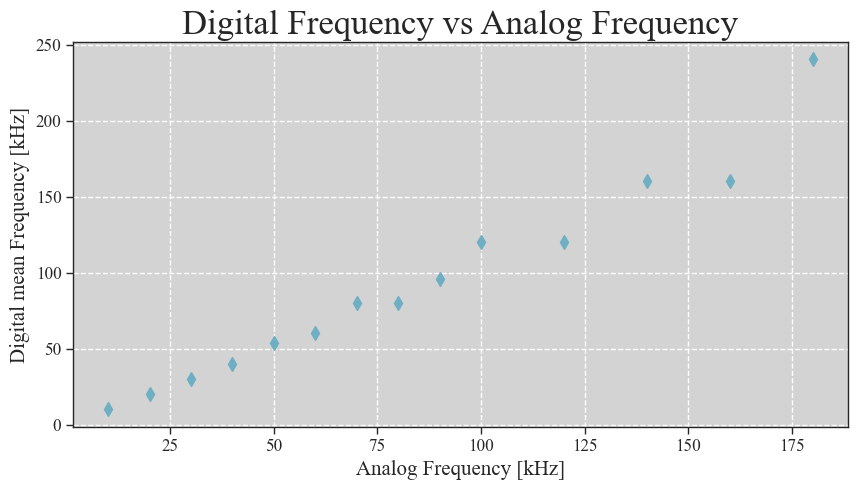

In [11]:
plt.plot(analog_freq, digital_freq, 'd', markersize=7, color=colors[0])
plt.xlabel('Analog Frequency [kHz]', fontsize=15)
plt.ylabel('Digital mean Frequency [kHz]', fontsize=15)
plt.title('Digital Frequency vs Analog Frequency', fontsize=25)

plt.savefig('figures/digi_vs_analog.png', dpi=150, bbox_inches='tight')

In [12]:
def freq(clk):
    freq=1/(2*clk*10**-8*1000)
    return freq

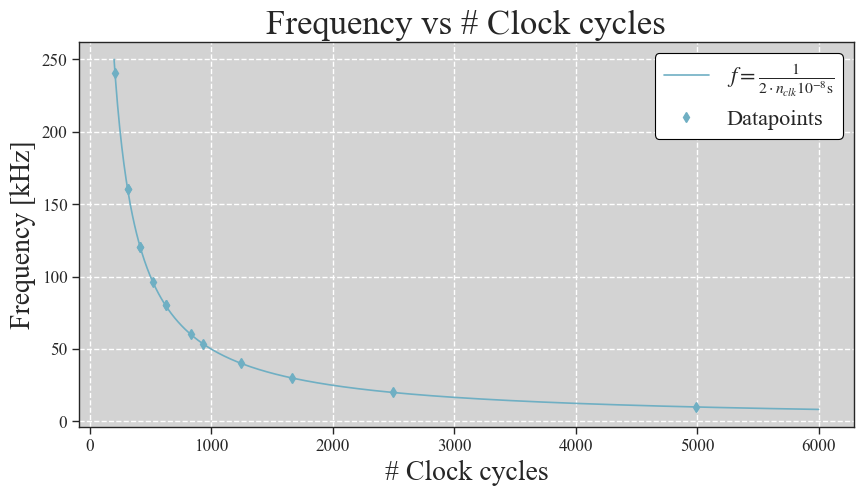

In [14]:
clock = np.linspace(200, 6000, 1000)
frequencies = freq(clock)
plt.plot(clock, frequencies, label = r'$f = \frac{1}{2\cdot n_{clk}10^{-8}\text{s}}$', color=colors[0])
plt.plot(clk_cycles, freq(clk_cycles), color=colors[0], marker= 'd', label = 'Datapoints', markersize=5, ls='')
plt.xlabel('# Clock cycles', fontsize=20)
plt.ylabel('Frequency [kHz]', fontsize=20)
plt.title('Frequency vs # Clock cycles', fontsize=25)
plt.legend()

plt.savefig('figures/freq_vs_clk.png', dpi=150, bbox_inches='tight')